<a href="https://colab.research.google.com/github/FDS116/Breast-Cancer-oDIDA/blob/main/Tauc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#oDIDA

## 8 min

In [2]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3419,0.3355,0.33,0.3254,0.321,0.3176,0.3144,0.3113,
                       0.3089,0.3064,0.3043,0.3028,0.3005,0.2991,0.2977,0.2964,
                       0.2955,0.2951,0.2946,0.2943,0.2938,0.2935,0.2926,0.2912,
                       0.2897,0.287,0.2837,0.2795,0.2739,0.2679,0.261,0.253,
                       0.2446,0.2361,0.2267,0.2177,0.2079,0.1984,0.1891,0.1797,
                       0.171,0.1627,0.1546,0.1461,0.139,0.1314,0.125,0.1187,
                       0.1131,0.1071,0.1018,0.0977,0.0919,0.0882,0.0835,0.0796,
                       0.0757,0.0721,0.0687,0.0657,0.0628,0.0605,0.0575,0.0554,
                       0.0525,0.0501,0.0485,0.0458,0.0439,0.0425,0.0403,0.0398,
                       0.0381,0.0368,0.0353,0.0347,0.033,0.0324,0.0293,0.0304,0.0274])
thickness_cm = 1

In [3]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [4]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [5]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [6]:
# 4. Choose the linear range
hv_linear = hν[26:40]
tauc_linear = tauc_y[26:40]

In [7]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

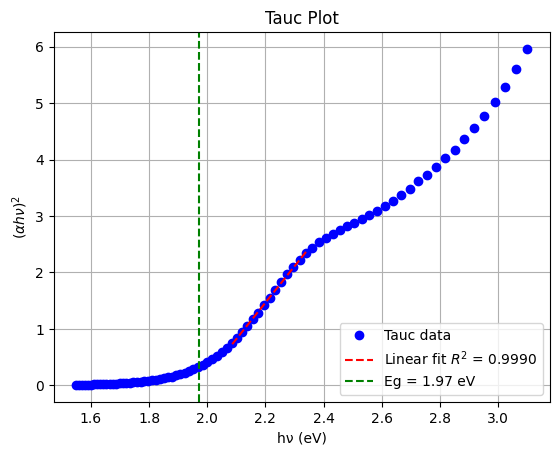

In [8]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.97  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.89 nm


## 13 min

In [10]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3411,0.3349,0.3294,0.3246,0.3203,0.317,0.3137,0.3108,
                       0.3082,0.3056,0.3037,0.3016,0.2998,0.2983,0.2967,0.2957,
                       0.2947,0.2944,0.2941,0.2939,0.2935,0.2931,0.2927,0.2913,
                       0.2896,0.287,0.2839,0.2799,0.2744,0.2684,0.2608,0.2535,
                       0.245,0.2359,0.2271,0.2179,0.2076,0.1987,0.189,0.1793,
                       0.1706,0.1623,0.1542,0.1458,0.1382,0.1306,0.1245,0.1182,
                       0.1118,0.1063,0.1008,0.0965,0.0912,0.0869,0.0826,0.0784,
                       0.0746,0.0715,0.0676,0.0644,0.0616,0.059,0.0565,0.054,
                       0.0516,0.0488,0.0472,0.0447,0.0432,0.0412,0.0392,0.0379,
                       0.0366,0.0346,0.0335,0.0339,0.032,0.0313,0.029,0.0288,0.0274])
thickness_cm = 1

In [11]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [12]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [13]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [14]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [15]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

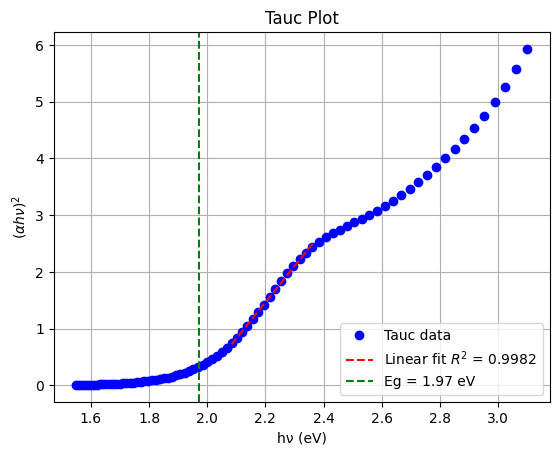

In [16]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.97  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.89 nm


## 30 min

In [18]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3426,0.3363,0.3309,0.3264,0.322,0.3184,0.3151,0.3122,
                       0.3096,0.3071,0.3049,0.3028,0.3009,0.2994,0.2978,0.2967,
                       0.2957,0.2951,0.2948,0.2946,0.2941,0.2939,0.2933,0.2921,
                       0.2902,0.2879,0.2844,0.2805,0.275,0.2692,0.262,0.2539,
                       0.2459,0.2364,0.2277,0.2181,0.2085,0.1993,0.1898,0.1796,
                       0.1711,0.1629,0.1548,0.1462,0.1388,0.1314,0.1248,0.1179,
                       0.1128,0.1066,0.1012,0.0967,0.091,0.087,0.0826,0.079,
                       0.0749,0.0712,0.0677,0.0637,0.0612,0.0589,0.0562,0.0538,
                       0.0506,0.0486,0.0469,0.0444,0.0433,0.041,0.0389,0.0377,
                       0.036,0.0353,0.0335,0.0333,0.0317,0.0297,0.029,0.0297,0.0262])
thickness_cm = 1

In [19]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [20]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [21]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [22]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [23]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

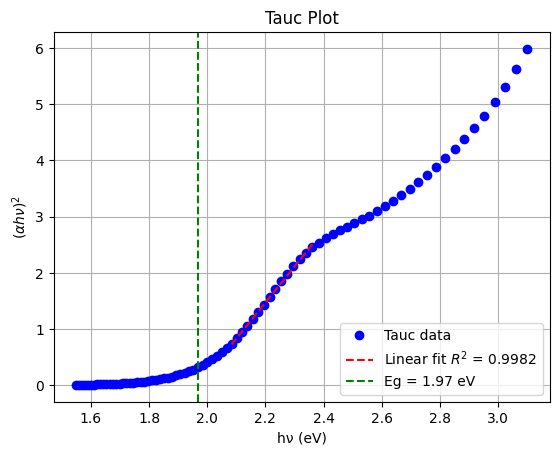

In [24]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.97  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.89 nm


##1 hour

In [26]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3445,0.3385,0.3333,0.3286,0.3242,0.3208,0.3178,0.3148,0.3121,0.3097,0.3075,0.3055,0.3035,0.302,0.3,0.2988,0.2977,0.297,0.2964,0.2961,0.2956,0.2953,0.2947,0.2933,0.2914,0.2891,0.2858,0.2817,0.2764,0.2704,0.2628,0.2554,0.2472,0.2379,0.2294,0.2198,0.2103,0.2011,0.1912,0.1821,0.1733,0.1649,0.1567,0.148,0.1409,0.1337,0.1267,0.1205,0.1146,0.109,0.1036,0.0987,0.0935,0.089,0.0845,0.0809,0.0762,0.0727,0.0696,0.0658,0.0636,0.0604,0.0578,0.0556,0.0531,0.0506,0.0489,0.0459,0.0439,0.0432,0.04,0.039,0.0371,0.036,0.0349,0.0326,0.0323,0.0313,0.0292,0.0293,0.0276])
thickness_cm = 1

In [27]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [28]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [29]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [30]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [31]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

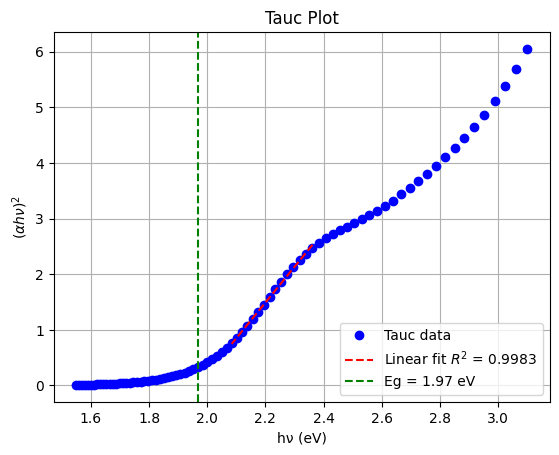

In [32]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.97  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.89 nm


##4 days

In [34]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3448,0.3378,0.332,0.327,0.3225,0.3192,0.3161,0.3132,0.3108,0.3084,0.3068,0.3048,0.3027,0.3013,0.2995,0.2978,0.2961,0.2948,0.2938,0.2927,0.2917,0.2904,0.2893,0.2873,0.2853,0.2822,0.2788,0.2748,0.2691,0.264,0.2572,0.2495,0.2412,0.233,0.224,0.2152,0.2061,0.197,0.1875,0.1783,0.1706,0.1607,0.1539,0.1454,0.1381,0.131,0.1249,0.1181,0.1118,0.1063,0.1006,0.0956,0.0911,0.0858,0.082,0.0776,0.0736,0.0708,0.0663,0.0634,0.0601,0.0578,0.0542,0.0521,0.0492,0.0475,0.0455,0.0438,0.042,0.0398,0.0385,0.0361,0.0347,0.0324,0.0329,0.0306,0.0304,0.0295,0.0278,0.0263,0.0247])
thickness_cm = 1

In [35]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [36]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [37]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [38]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [39]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

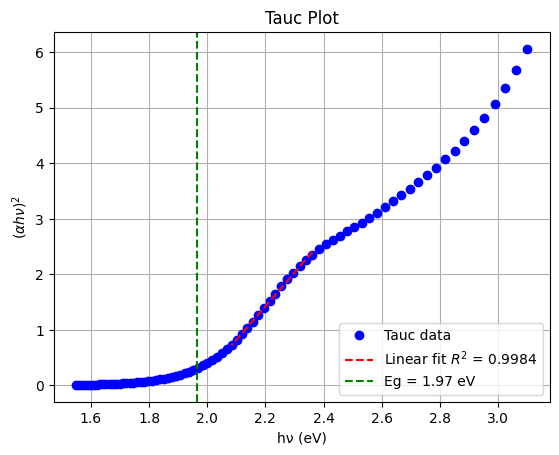

In [40]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.97  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.89 nm


## 14 days

In [42]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.4246,0.4133,0.4034,0.3951,0.3884,0.3831,0.3779,0.3735,0.3696,0.366,0.3629,0.3595,0.3569,0.3539,0.3514,0.3488,0.3458,0.3438,0.3414,0.3395,0.3372,0.3351,0.3325,0.3296,0.3266,0.3222,0.3179,0.3125,0.3057,0.2992,0.2917,0.2831,0.2741,0.2653,0.2555,0.2466,0.2366,0.2268,0.2172,0.2073,0.1985,0.1903,0.1818,0.1734,0.1653,0.1577,0.1511,0.1439,0.1377,0.1317,0.1255,0.1201,0.1154,0.1098,0.1056,0.1013,0.0973,0.0939,0.0893,0.0864,0.0828,0.0804,0.077,0.0749,0.0724,0.0709,0.0674,0.0649,0.0638,0.0607,0.0597,0.0581,0.0564,0.0549,0.0534,0.0521,0.0506,0.0487,0.0486,0.0445,0.0468])
thickness_cm = 1

In [43]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [44]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [45]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [46]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [47]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

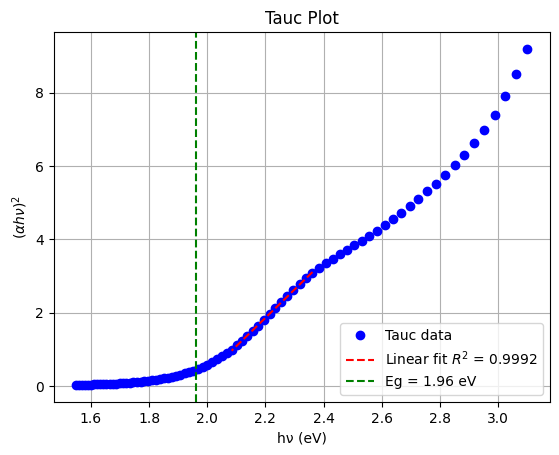

In [48]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.96  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.90 nm


## 27 days

In [50]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.4246,0.4133,0.4034,0.3951,0.3884,0.3831,0.3779,0.3735,0.3696,0.366,0.3629,0.3595,0.3569,0.3539,0.3514,0.3488,0.3458,0.3438,0.3414,0.3395,0.3372,0.3351,0.3325,0.3296,0.3266,0.3222,0.3179,0.3125,0.3057,0.2992,0.2917,0.2831,0.2741,0.2653,0.2555,0.2466,0.2366,0.2268,0.2172,0.2073,0.1985,0.1903,0.1818,0.1734,0.1653,0.1577,0.1511,0.1439,0.1377,0.1317,0.1255,0.1201,0.1154,0.1098,0.1056,0.1013,0.0973,0.0939,0.0893,0.0864,0.0828,0.0804,0.077,0.0749,0.0724,0.0709,0.0674,0.0649,0.0638,0.0607,0.0597,0.0581,0.0564,0.0549,0.0534,0.0521,0.0506,0.0487,0.0486,0.0445,0.0468])
thickness_cm = 1

In [51]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [52]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [53]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [54]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [55]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

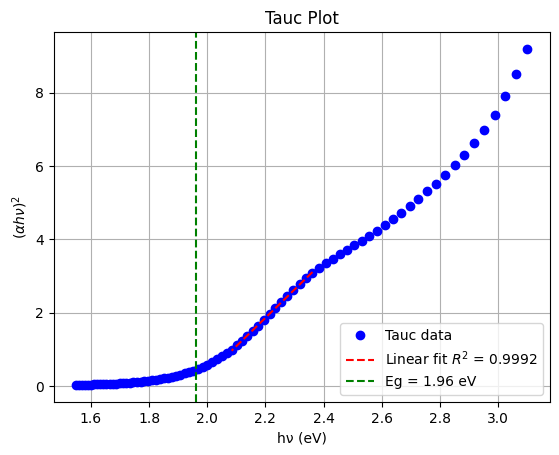

In [56]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.96  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.90 nm


## 35 days

In [58]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.405,0.3957,0.3879,0.3825,0.3776,0.3739,0.3707,0.3675,0.3646,0.3615,0.3589,0.3561,0.3534,0.351,0.3485,0.3461,0.344,0.3423,0.3406,0.3389,0.3371,0.3355,0.3329,0.3306,0.3277,0.3236,0.3197,0.3145,0.3084,0.3019,0.2946,0.286,0.2772,0.268,0.2588,0.25,0.2401,0.2304,0.2206,0.2112,0.2023,0.1943,0.1851,0.1786,0.1695,0.1613,0.1552,0.1487,0.1425,0.1362,0.1301,0.1241,0.119,0.1134,0.1095,0.105,0.1004,0.0967,0.0935,0.0902,0.0866,0.0838,0.0806,0.0783,0.0756,0.0729,0.0702,0.0683,0.0668,0.0632,0.0631,0.0604,0.058,0.0563,0.0557,0.0533,0.0524,0.0514,0.0497,0.0491,0.0473])
thickness_cm = 1

In [59]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [60]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [61]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [62]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [63]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

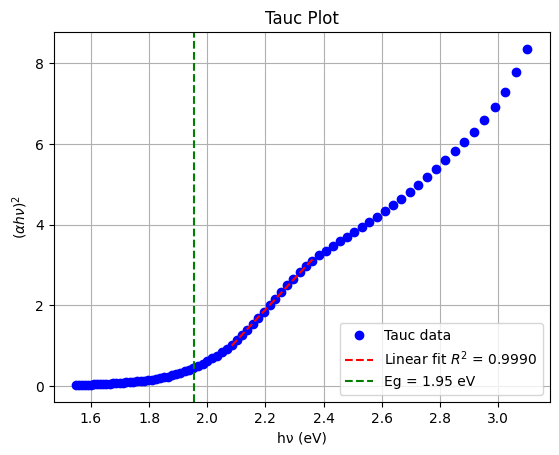

In [64]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.95  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.96 nm
Estimated diameter: 3.92 nm


## 40 days

In [66]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.4094,0.3998,0.3922,0.3862,0.3814,0.3777,0.3745,0.3715,
                       0.3686,0.3659,0.3633,0.3607,0.3583,0.356,0.3537,0.3516,
                       0.3491,0.3478,0.346,0.3445,0.3434,0.3416,0.3395,0.3372,
                       0.334,0.3302,0.3262,0.3213,0.3151,0.3081,0.301,0.2922,
                       0.2828,0.2738,0.264,0.2546,0.2453,0.2354,0.2249,0.2156,
                       0.2067,0.1976,0.1901,0.1821,0.1737,0.1655,0.1586,0.1522,
                       0.1457,0.1396,0.1334,0.1285,0.1229,0.1172,0.1121,0.1074,
                       0.1034,0.0989,0.0949,0.0909,0.0881,0.0851,0.0825,0.0796,
                       0.0772,0.0738,0.0707,0.0694,0.0679,0.0644,0.0635,0.0617,
                       0.0592,0.0574,0.0571,0.0539,0.0532,0.0517,0.0513,0.0506,0.0479])
thickness_cm = 1

In [67]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [68]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [69]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [70]:
# 4. Choose the linear range
hv_linear = hν[25:35]
tauc_linear = tauc_y[25:35]

In [71]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

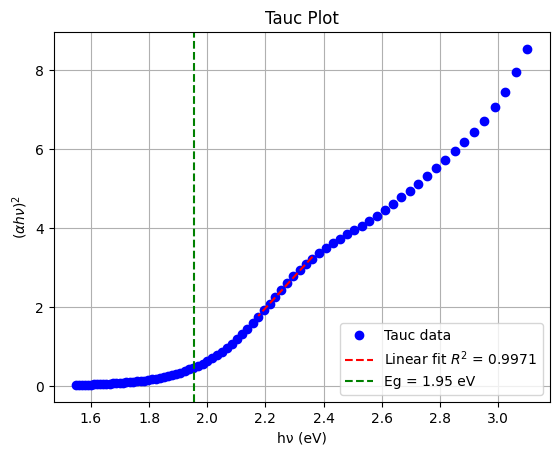

In [72]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--', label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.95  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.96 nm
Estimated diameter: 3.92 nm


##47 days

In [74]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.3466,0.3405,0.3357,0.3324,0.3295,0.3273,0.3251,0.3234,0.3217,0.3196,0.3176,0.3157,0.3137,0.3119,0.3102,0.3083,0.3067,0.3053,0.3042,0.3029,0.3018,0.3002,0.2993,0.297,0.2944,0.2913,0.2875,0.2828,0.2772,0.271,0.2645,0.257,0.2483,0.2397,0.2309,0.2225,0.2134,0.2048,0.1954,0.1861,0.178,0.1695,0.1615,0.1543,0.1464,0.1394,0.1329,0.1269,0.1209,0.1148,0.1099,0.1048,0.1004,0.0953,0.091,0.0873,0.0831,0.0801,0.0758,0.0731,0.0702,0.0678,0.064,0.0625,0.0597,0.0575,0.0557,0.0537,0.0525,0.0497,0.0488,0.0467,0.0455,0.0437,0.044,0.0419,0.041,0.0396,0.0384,0.0373,0.0362])
thickness_cm = 1

In [75]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [76]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [77]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [78]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [79]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

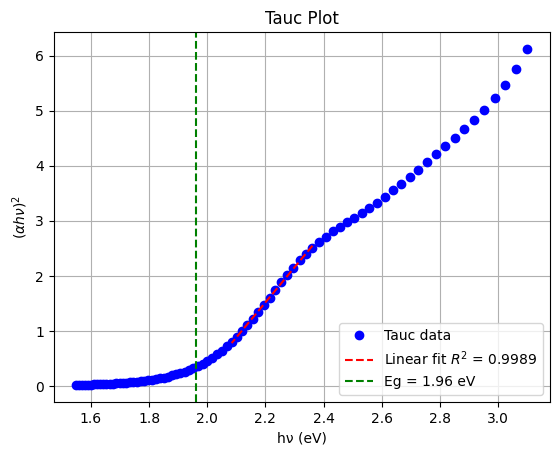

In [80]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [81]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.96  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.90 nm


## 55 days

In [82]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.4308,0.4207,0.4127,0.4065,0.4015,0.3976,0.3934,0.3901,0.3869,0.3833,0.3799,0.3767,0.3735,0.3704,0.3673,0.3642,0.3613,0.359,0.3568,0.3546,0.3524,0.3502,0.3477,0.3447,0.3411,0.337,0.3322,0.3272,0.3203,0.3138,0.3058,0.2976,0.2872,0.2779,0.2683,0.2592,0.2485,0.2386,0.2285,0.2195,0.2095,0.201,0.1928,0.1835,0.1758,0.1676,0.1602,0.1533,0.1472,0.1406,0.1343,0.1293,0.1239,0.1192,0.1143,0.1095,0.1058,0.1021,0.0977,0.0938,0.0915,0.0866,0.085,0.0825,0.0795,0.0763,0.0743,0.0717,0.0709,0.0686,0.0669,0.0637,0.0634,0.0616,0.059,0.0588,0.0575,0.055,0.0547,0.0536,0.0515])
thickness_cm = 1

In [83]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [84]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [85]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [86]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [87]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

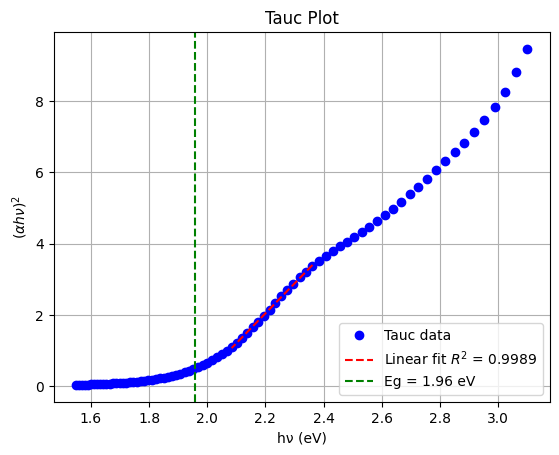

In [88]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [89]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.96  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.90 nm


## 61 days

In [90]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.4441,0.4337,0.425,0.4189,0.4134,0.4087,0.4047,0.4006,0.3975,0.3934,0.3891,0.385,0.3813,0.3777,0.3743,0.3707,0.3672,0.3641,0.3613,0.3588,0.3562,0.3535,0.3505,0.3471,0.343,0.3392,0.3334,0.3276,0.3215,0.3137,0.3062,0.2971,0.2878,0.2784,0.2691,0.2594,0.2486,0.2395,0.2293,0.22,0.2104,0.2025,0.1937,0.1855,0.1778,0.1707,0.1632,0.156,0.1497,0.1432,0.1377,0.1319,0.1265,0.1224,0.1185,0.1143,0.1094,0.1056,0.1017,0.098,0.0945,0.0921,0.0901,0.0876,0.0851,0.0827,0.0799,0.0786,0.0767,0.0744,0.0729,0.0707,0.0696,0.0667,0.0645,0.0634,0.0625,0.0612,0.0587,0.0568,0.0559])
thickness_cm = 1

In [91]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [92]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [93]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [94]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [95]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

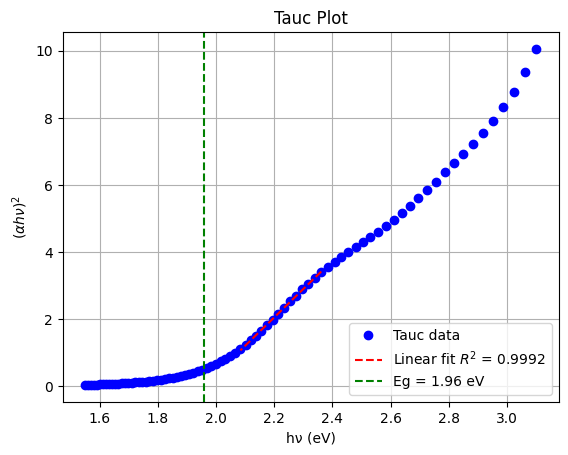

In [96]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [97]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.96  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.95 nm
Estimated diameter: 3.90 nm


## 105 days

In [98]:
# Data
wavelength = np.array([400,405,410,415,420,425,430,435,440,445,450,455,460,465,
                       470,475,480,485,490,495,500,505,510,515,520,525,530,535,
                       540,545,550,555,560,565,570,575,580,585,590,595,600,605,
                       610,615,620,625,630,635,640,645,650,655,660,665,670,675,
                       680,685,690,695,700,705,710,715,720,725,730,735,740,745,
                       750,755,760,765,770,775,780,785,790,795,800])  # nm
absorbance = np.array([0.6393,0.6216,0.6082,0.5975,0.5888,0.5816,0.5748,0.5684,0.5623,0.5559,0.5496,0.5426,0.5351,0.529,0.5218,0.5145,0.5077,0.5014,0.4957,0.4903,0.4848,0.4793,0.4738,0.4688,0.4633,0.4572,0.451,0.444,0.4357,0.4278,0.4185,0.4087,0.3975,0.3875,0.3764,0.3657,0.3544,0.3432,0.3317,0.3204,0.31,0.2996,0.2901,0.2804,0.2707,0.261,0.2536,0.2443,0.237,0.2291,0.2229,0.2158,0.209,0.2032,0.1972,0.1922,0.187,0.1824,0.1773,0.1735,0.1689,0.1651,0.1611,0.1578,0.1546,0.1516,0.1487,0.1458,0.1427,0.1409,0.1394,0.1365,0.1347,0.1315,0.1297,0.1272,0.1245,0.1244,0.1221,0.1206,0.1174])
thickness_cm = 1

In [99]:
# 1. Convert λ to hν (eV)
hν = 1240 / wavelength

In [100]:
# 2. Calculate α
alpha = 2.303 * absorbance / thickness_cm

In [101]:
# 3. Calculate (αhν)^2
tauc_y = (alpha * hν)**2

In [102]:
# 4. Choose the linear range
hv_linear = hν[25:40]
tauc_linear = tauc_y[25:40]

In [103]:
# 5. Linear fitting and obtaining Eg
slope, intercept, r_value, p_value, std_err = linregress(hv_linear, tauc_linear)
Eg = -intercept / slope
R2_tauc = r_value**2

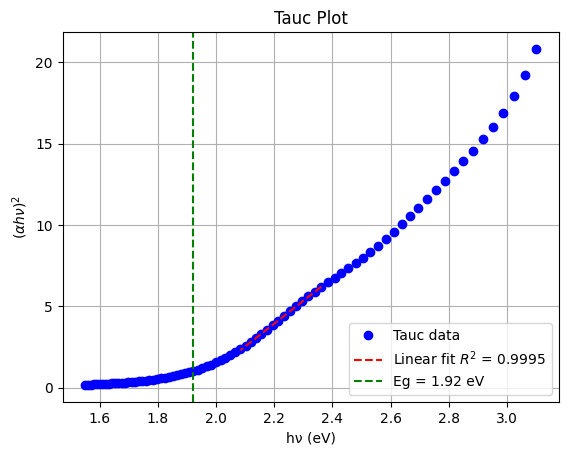

In [104]:
# 6. Plot
plt.plot(hν, tauc_y, 'bo', label='Tauc data')
plt.plot(hv_linear, slope*hv_linear + intercept, 'r--',  label=f'Linear fit $R^2$ = {R2_tauc:.4f}')
plt.axvline(x=Eg, color='g', linestyle='--', label=f'Eg = {Eg:.2f} eV')
plt.xlabel('hν (eV)')
plt.ylabel('$(\\alpha h\\nu)^2$')
plt.title('Tauc Plot')
plt.grid(True)
plt.legend()
plt.show()

In [105]:
# Typical parameters for gold nanoparticles
Eg_measured = 1.92  # eV
A = 5.0            # eV·nm^n
n = 1.4            #

# Estimate the radius
R = (A / Eg_measured)**(1 / n)
D = 2 * R  # diámetro

print(f"Estimated radius: {R:.2f} nm")
print(f"Estimated diameter: {D:.2f} nm")

Estimated radius: 1.98 nm
Estimated diameter: 3.96 nm
